# 第7章　函数与异常处理

## 7.1　导学

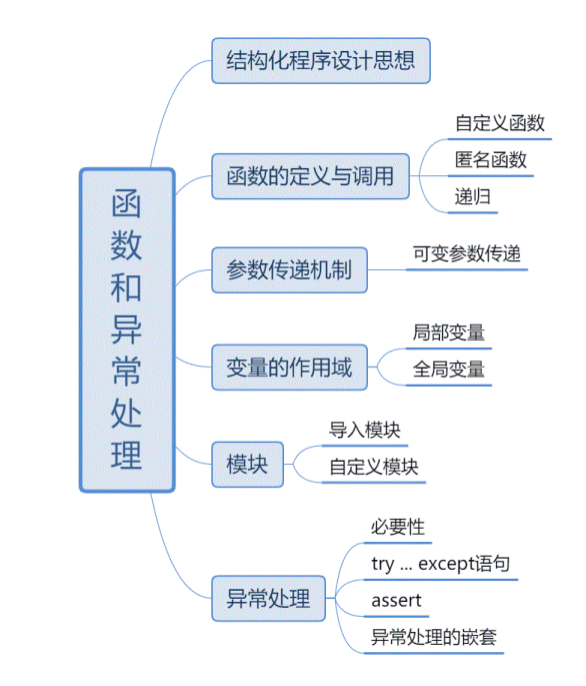

# 内容回顾

## 7.3　变量作用域

在python中，使用一个变量时并不严格要求预先声明它,但是在真正使用它之前，它必须被绑定到某个内存对象（被定义、赋值）

* 在Python程序中创建、改变、查找变量名时，都是在一个保存变量名的空间中进行，可以称之为命名空间，也可以称之为作用域。
* Python的作用域是静态的，在源代码中变量名被赋值的位置决定了该变量能被访问的范围。Python变量的作用域由变量所在源代码中的位置决定。

### 7.3.1　作用域的类型

* L(local)局部作用域
* E(enclosing)嵌套作用域
* G(global)全局作用域
* B(built-in)内置作用域：系统内固定模块里定义的变量，如预定义在builtin 模块内的变量max

### 局部作用域：一个函数被调用时，就创建了一个局部作用域。在这个函数内赋值的所有变量，存在于该局部作用域内
包含在def关键字定义的语句块中，即在函数中定义的变量。每当函数被调用时都会创建一个新的局部作用域（局部变量是暂时存在的，依赖于该局部作用域的函数是否处于活动的状态）

* 一个函数被调用时，就创建了一个局部作用域。在这个函数内赋值的所有变量，存在于该局部作用域内。该函数返回时，这个局部作用域就被销毁了，这些变量就丢失了。下次调用这个函数，局部变量不会记得该函数上次被调用时它们保存的值

### 嵌套作用域：也是包含在def关键字中的，
与局部作用域的区别是，对于一个函数而言，局部作用域是定义在此函数内部的局部作用域，而嵌套作用域是定义在此函数的上一层父级函数的局部作用域
但嵌套作用域和局部作用域是相对的，嵌套作用域相对于更上层的函数而言也是局部作用域

### 全局作用域：每一个模块都是一个全局作用域（全局作用域的作用范围仅限于单个模块文件内）
在模块层次中定义的变量称为全局变量
应尽量少定义全局变量，它在模块文件运行的过程中会一直存在，占用内存空间


* (局部、全局的区别)在被调用函数内赋值的变量，处于该函数的局部作用域。在所有函数之外赋值的变量，属于全局作用域。
* 一个变量必是其中一种，不能在同一时刻既是局部的又是全局的。

### 内置作用域：系统内固定模块里定义的变量，如定义在builtin模块内的变量
builtins是python的内建模块，所谓内建模块就是你在使用时不需要import，在python启
动后，在没有执行程序员编写的任何代码前，python会加载内建模块中的函数到内存中。比如经常
使用的abs(),str(),type()等。

##### 可以将作用域看成是变量的容器。当作用域被销毁时，所有保存在该作用域内的变量的值就被丢弃了。只有一个全局作用域，它是在程序开始时创建的。如果程序终止， 全局作用域就被销毁，它的所有变量就被丢弃了。否则，在下次运行程序的时候，这些变量就会记住它在上次运行时的值。

# 注意事项

1. 全局作用域中的代码不得使用任何局部变量

2. 局部作用域可以访问全局变量

3. 一个函数的局部作用域中的代码不能使用其他局部作用域中的变量

4. 如果在不同的作用域中，可以使用相同的名字命名不同的变量

### 7.3.3　作用域优先级

* LEGB法则：当在函数中使用未确定的变量名时，Python会按照优先级依次搜索4个作用域，以此来确定该变量名的意义。首先搜索局部作用域(L)，之后是上一层嵌套结构中def或lambda函数的嵌套作用域(E)，之后是全局作用域(G)，最后是内置作用域(B)。

# 注意事项

* Python中模块内的函数体代码在运行前会经过预编译（不管变量名的绑定发生在作用域的哪个位置，都能被编译器检测到）
* Python中模块内的代码并不会经过预编译
* Python是一门静态作用域语言，但变量名查找是动态发生的（直到程序正式运行时，才会发现作用域方面的问题）
* Python中“变量绑定到一个内存对象”指的是赋值操作

### 7.3.4　global语句

如果需要在一个函数内修改全局变量，就使用 global 语句。

## 区分一个变量是处于局部作用域还是全局作用域的法则：
1. 如果变量在全局作用域中使用（即在所有函数之外），它就总是全局变量。




2. 如果在一个函数中，有针对该变量的 global 语句，它就是全局变量。




3. 无global的情况下，如果该变量没有用在赋值语句中，它就是全局变量。


4. 无global的情况下，如果该变量用于函数中的赋值语句，它就是局部变量。


## 7.4　异常处理

程序运行时常会碰到一些错误，例如除数为 0、年龄为负数、数组下标越界、I/O读写错误等  
这些错误如果不能发现并加以处理，可能导致程序崩溃。

In [ ]:
def get_quotient(b):
    a = 10
    print("the result of %d/%d is:\t%f"%(a,b,a/b))

while True:
    b=int(input("Please input b:"))
    get_quotient(b)



异常处理机制，可以捕获并处理这些错误，让程序继续执行。

借助异常处理机制，在程序崩溃前可以做一些必要的工作，例如将内存中的数据写入文件、关闭打开的文件、释放分配的内存等。

Python 异常处理机制会涉及 try、except、else、finally 这 4 个关键字，以及可主动引发异常的 raise 语句


### 7.4.1 异常定义

程序运行出错的原因

1. 语法错误

语法错误指的是解析代码时出现的错误。当代码不符合 Python 语法规则时，Python解释器在解析时就会报出 SyntaxError 语法错误，与此同时还会明确指出最早探测到错误的语句。语法错误多是开发者疏忽导致的，属于真正意义上的错误，是解释器无法容忍的，因此，只有将程序中的所有语法错误全部纠正，程序才能执行。

2. 运行时错误

运行时错误，即程序在语法上都是正确的，但在运行时发生了错误。

In [ ]:
a = 1/0

在 Python 中，把这种运行时产生错误的情况叫做异常（Exceptions）。  
常见的几种异常情况:  

AssertionError:当 assert 关键字后的条件为假时，程序运行会停止并抛出该异常

AttributeError:当试图访问的对象属性不存在时抛出的异常
    
IndexError:索引超出序列范围会引发此异常
    
KeyError:字典中查找一个不存在的关键字时引发此异常
    
NameError:尝试访问一个未声明的变量时，引发此异常
    
TypeError:不同类型数据之间的无效操作
    
ZeroDivisionError:除法运算中除数为 0 引发此异常


### 7.4.2 try-except语句

使用try语句，可以快速捕获和处理异常，其语法的简单结构如下：

try:
    
    可能产生异常的代码块
    
except  [Exception] [as e]:
    
    异常处理模块
    

In [3]:
# 常用基本形式
#使用try except 捕获异常
try:
    print(1/0)
except Exception as e:
    print(e)

division by zero


In [5]:
def get_quotient(b):
    a = 10
    try:
        print("the result of %d/%d is:\t%f"%(a,b,a/b))
    except Exception as e:
        print(e)

while True:
    b=int(input("Please input b:"))
    get_quotient(b)


Please input b:0
division by zero
Please input b:0
division by zero
Please input b:0
division by zero


KeyboardInterrupt: Interrupted by user

## 可以根据具体的异常类型来做处理，其语法结构为：

try:
    
    可能产生异常的代码块
    
except [ (Error1, Error2, ... ) [as e] ]:
    
    处理异常的代码块1
    
except [ (Error3, Error4, ... ) [as e] ]:
    
    处理异常的代码块2
    
except  [Exception]:    
    
    处理其它异常

In [8]:
try:
    a = [5, 6, 3, 1]
    b = {11:0, 111:100, 1111:1000}
    index=int(input("您输入访问a的索引："))
    key=int(input("您输入访问b的键："))
    print(a[index]/b[key])
    
except (IndexError, KeyError) as e:
    print("程序发生了访问异常！！！")
    print("info:\t",e)
    
except :
    print("未知异常")

print("程序继续运行")

您输入访问a的索引：99
您输入访问b的键：111
程序发生了访问异常！！！
info:	 list index out of range
程序继续运行


### 在原本的try except结构的基础上，Python 异常处理机制还提供了一个 else 块。  
只有当 try 块没有捕获到任何异常时，才会执行else代码块。  
else必须在except语句之后。

try:
    
    可能产生异常的代码块
    
except [ (Error1, Error2, ... ) [as e] ]:
    
    处理异常的代码块1
    
except [ (Error3, Error4, ... ) [as e] ]:
    
    处理异常的代码块2
    
except  [Exception]:
    
    处理其它异常
    
[else:
 
    没有异常时执行]

In [11]:
try:
    a = [5, 6, 3, 1]
    b = {11:0, 111:100, 111:1000}
    index=int(input("您输入访问a的索引："))
    key=int(input("您输入访问b的键："))
    print(a[index]/b[key])
except (IndexError, KeyError) as e:
    print("程序发生了访问异常！！！")
    print("info:\t",e)
except :
    print("未知异常")
else:
    print("程序没有异常发生！！！")

print("程序继续运行")

您输入访问a的索引：0
您输入访问b的键：111
0.005
程序没有异常发生！！！
程序继续运行


In [13]:
try:
    result = 20 / int(input('请输入除数:'))
    print(result)
except ValueError:
    print('必须输入整数')
except ArithmeticError:
    print('算术错误，除数不能为 0')
else:
    print('没有出现异常')
print("继续执行")

请输入除数:9
2.2222222222222223
没有出现异常
继续执行


### 如果把 else 块去掉，将其中的代码编写到 try except 的后面，如下所示，则与上面的代码在效果上有何区别？

In [15]:
try:
    result = 20 / int(input('请输入除数:'))
    print(result)
except ValueError:
    print('必须输入整数')
except ArithmeticError:
    print('算术错误，除数不能为 0')

print('没有出现异常')
print("继续执行")

请输入除数:k
必须输入整数
没有出现异常
继续执行


### 注意： else 必须和 try except 搭配使用。

#### Python 异常处理机制还提供了一个 finally 语句，通常用来为 try 块中的程序做扫尾清理工作。
* 注意，和 else 语句不同，finally 只要求和 try 搭配使用，而至于该结构中是否包含 except 以及 else，对于 finally 不是必须的
* 在整个异常处理机制中，finally 语句的功能是：无论 try 块是否发生异常，最终都要进入 finally 语句，并执行其中的代码块。

try:
    
    可能产生异常的代码块
    
except [ (Error1, Error2, ... ) [as e] ]:
    
    处理异常的代码块1
    
except [ (Error3, Error4, ... ) [as e] ]:
    
    处理异常的代码块2
    
except  [Exception]:
    
    处理其它异常
    
[else:
 
    没有异常时执行]

[finally:
 
    无论是否有异常都执行]


In [9]:
try:
    a = int(input("请输入 a 的值:"))
    print(20/a)
except:
    print("发生异常！")
else:
    print("执行 else 块中的代码")   
finally :
    print("执行 finally 块中的代码")

请输入 a 的值:o
发生异常！
执行 finally 块中的代码


#### 即便当 try 块发生异常，且没有合适的 except 处理异常时，finally 块中的代码也会得到执行。(程序结束)

In [18]:
try:
    #发生异常
    print(20/0)
finally:
    print("执行 finally 块中的代码")

执行 finally 块中的代码


ZeroDivisionError: division by zero

#### * finally常用于文件读写、并发任务时的资源访问等场景  
例如：完成读写文件后，要求关闭该文件。

* 每种异常都提供了如下几个属性和方法，通过调用它们，可以获取当前异常的相关信息：

args：返回异常的错误编号和描述字符串；

str(e)：返回异常信息，但不包括异常信息的类型；

repr(e)：返回较全的异常信息，包括异常信息的类型。


In [10]:
try:
    1/0
except Exception as e:
    # 访问异常的错误编号和详细信息
    print(e.args)
    print(str(e))
    print(repr(e))

('division by zero',)
division by zero
ZeroDivisionError('division by zero')


### 7.4.3 抛出异常

Python 允许在程序中手动触发异常，使用 raise 语句即可。

有一些异常，是程序正常运行的结果，比如用 raise 手动引发的异常。

raise 语句的基本语法格式为：

raise [exceptionName [(reason)]]

raise 语句有如下三种常用的用法：

raise：单独一个 raise。该语句引发当前上下文中捕获的异常（比如在 except 块中），或默认引发 RuntimeError 异常。

raise 异常类名称：raise 后带一个异常类名称，表示引发执行类型的异常。

raise 异常类名称(描述信息)：在引发指定类型的异常的同时，附带异常的描述信息。



#### raise 语句引发的异常通常用 try except（else finally）异常处理结构来捕获并进行处理。

In [20]:
try:
    a = input("输入一个数：")
    #判断用户输入的是否为数字
    if(not a.isdigit()):
        raise ValueError("a 必须是数字")
except ValueError as e:
    print("引发异常：",repr(e))

输入一个数：i
引发异常： ValueError('a 必须是数字')


#### 使用 raise 语句时可以不带参数

当在没有引发过异常的程序使用无参的 raise 语句时，它默认引发的是 RuntimeError 异常

In [24]:
try:
    a = input("输入一个数：")
    if(not a.isdigit()):
        raise
except RuntimeError as e:
    print("引发异常：",repr(e))

输入一个数：i
引发异常： RuntimeError('No active exception to reraise')


In [25]:
try:
    a = input("输入一个数：")
    #判断用户输入的是否为数字
    if(not a.isdigit()):
        raise ValueError("a 必须是数字")
except ValueError as e:
    print("引发异常：",repr(e))
    raise 

输入一个数：o
引发异常： ValueError('a 必须是数字')


ValueError: a 必须是数字

In [30]:
try:
    a = input("输入一个数：")
    #判断用户输入的是否为数字
    if(not a.isdigit()):
        raise ValueError("a 必须是数字")
except ValueError as e:
    print("引发异常：",repr(e))
    try:
        raise RuntimeError
    except RuntimeError as c:
        print("hhhh：",repr(c))
        

输入一个数：o
引发异常： ValueError('a 必须是数字')
hhhh： RuntimeError()


* assert 断言，确保表达式结果为真  
语法格式 assert expression [, str_info]

In [12]:
assert 2 < 1, "出现错误了！"

AssertionError: 出现错误了！

## 小结

* 函数就是一段组织好的，可重复使用的，完成某项功能的代码段。函数的好处在于能提高应用程序的模块性、提高可维护性、提高代码的复用性，同时有利于封装。
* 注意区分变量的作用域。
* 借助异常处理机制，在程序崩溃前可以做一些必要的工作，提高代码的健壮性。